In [1]:
# Daten einlesen

wetterdaten <- readRDS("datasets/rds/wetterdaten.rds")

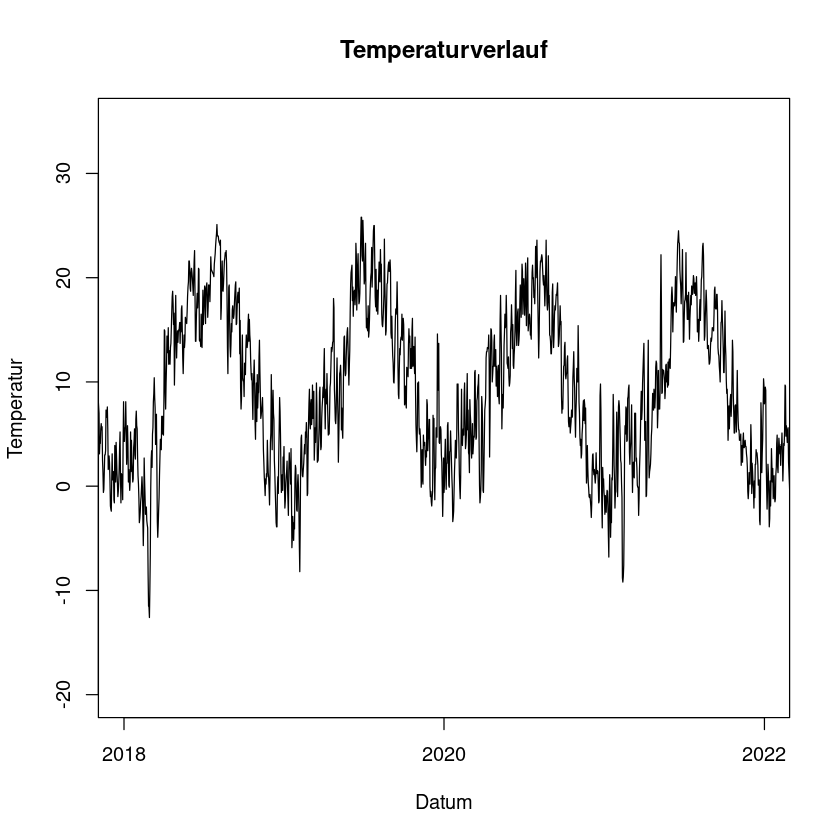

In [2]:
plot(wetterdaten[[1]]$MESS_DATUM, wetterdaten[[1]]$TMK, type="l", xlab="Datum", ylab="Temperatur", main="Temperaturverlauf", 
xlim = c(as.Date("2018-01-01"), as.Date("2021-12-31")),
ylim = c(-20, 35)
)

In [9]:
# Daten für die nächsten drei Jahre filtern (2014-2016)
daten_gefiltert <- subset(wetterdaten[[1]], MESS_DATUM >= as.Date("2014-01-01") & MESS_DATUM <= as.Date("2023-12-31"))

# Zeitindex als unabhängige Variable hinzufügen
daten_gefiltert$Zeitindex <- as.numeric(daten_gefiltert$MESS_DATUM - min(daten_gefiltert$MESS_DATUM))

# Lineare Regression
modell_poly <- lm(TMK ~ poly(Zeitindex, 16), data = daten_gefiltert)

# Modellzusammenfassung anzeigen
summary(modell_poly)



Call:
lm(formula = TMK ~ poly(Zeitindex, 16), data = daten_gefiltert)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.5157  -5.0945  -0.0335   4.9502  17.3144 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)              9.869      0.114  86.545  < 2e-16 ***
poly(Zeitindex, 16)1    15.666      6.872   2.280  0.02268 *  
poly(Zeitindex, 16)2     7.956      6.872   1.158  0.24701    
poly(Zeitindex, 16)3    19.871      6.872   2.892  0.00385 ** 
poly(Zeitindex, 16)4    -0.324      6.872  -0.047  0.96240    
poly(Zeitindex, 16)5    14.568      6.872   2.120  0.03407 *  
poly(Zeitindex, 16)6   -43.428      6.872  -6.320 2.94e-10 ***
poly(Zeitindex, 16)7     1.659      6.872   0.241  0.80919    
poly(Zeitindex, 16)8   -41.176      6.872  -5.992 2.27e-09 ***
poly(Zeitindex, 16)9     3.116      6.872   0.453  0.65026    
poly(Zeitindex, 16)10  -73.212      6.872 -10.654  < 2e-16 ***
poly(Zeitindex, 16)11  -15.386      6.872  -2.239  0.0

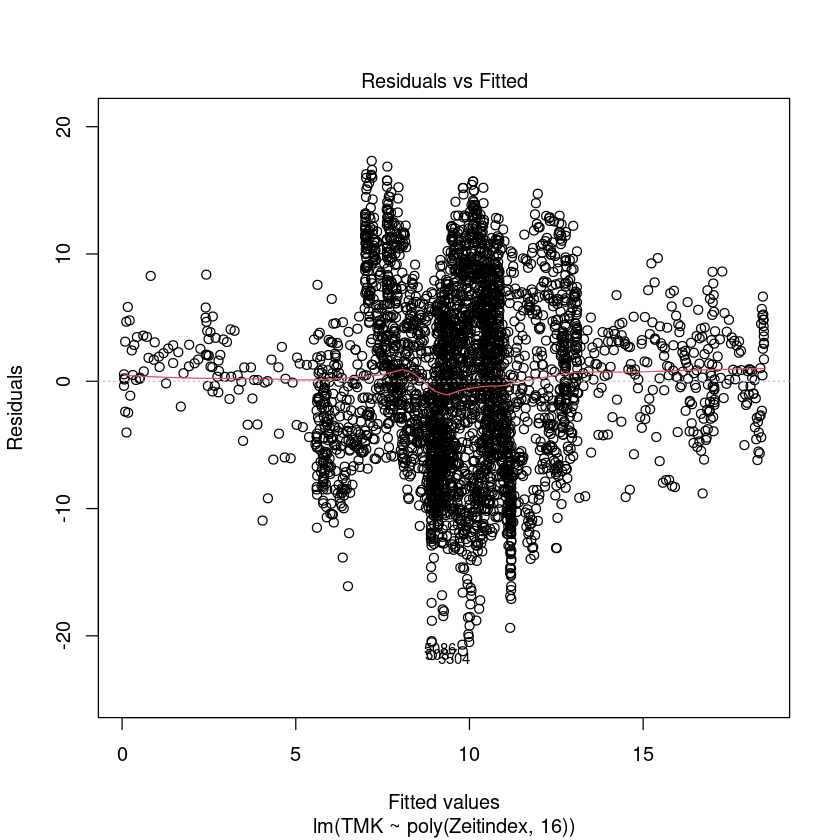

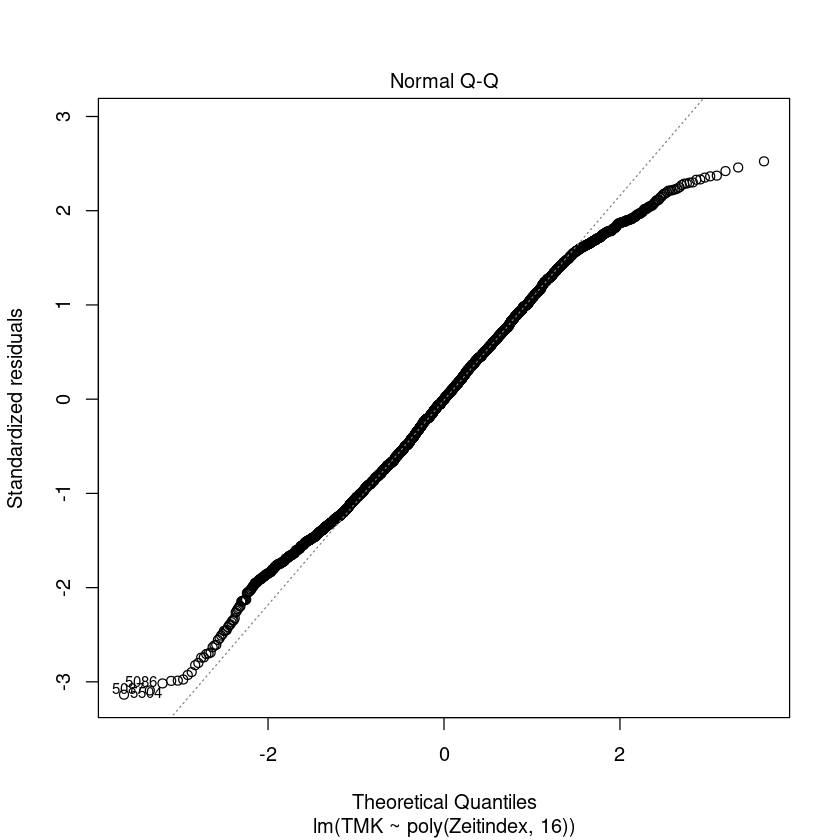

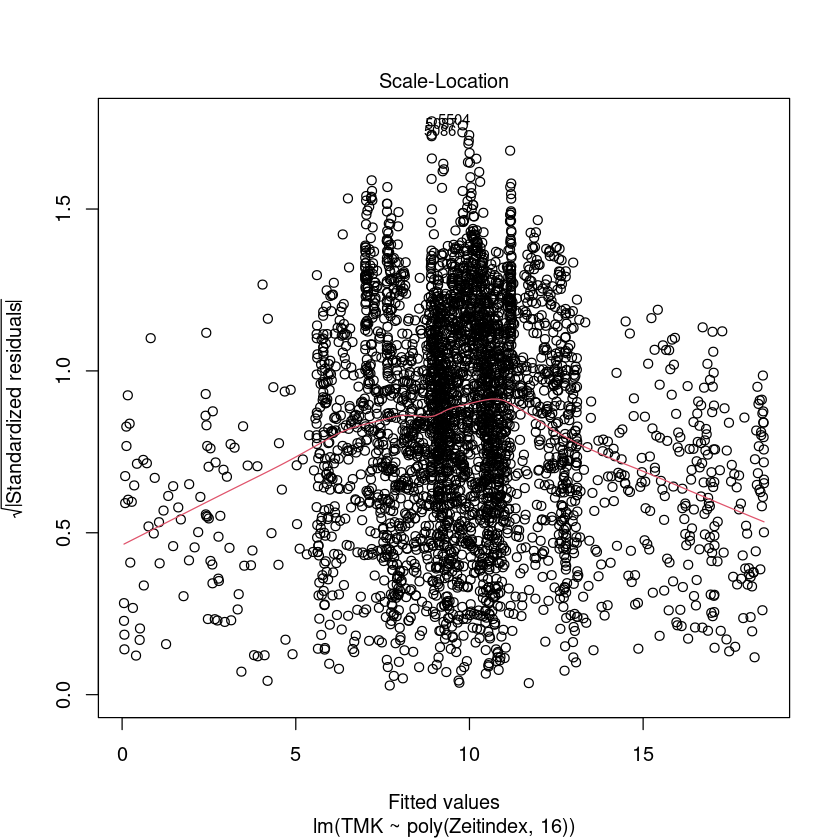

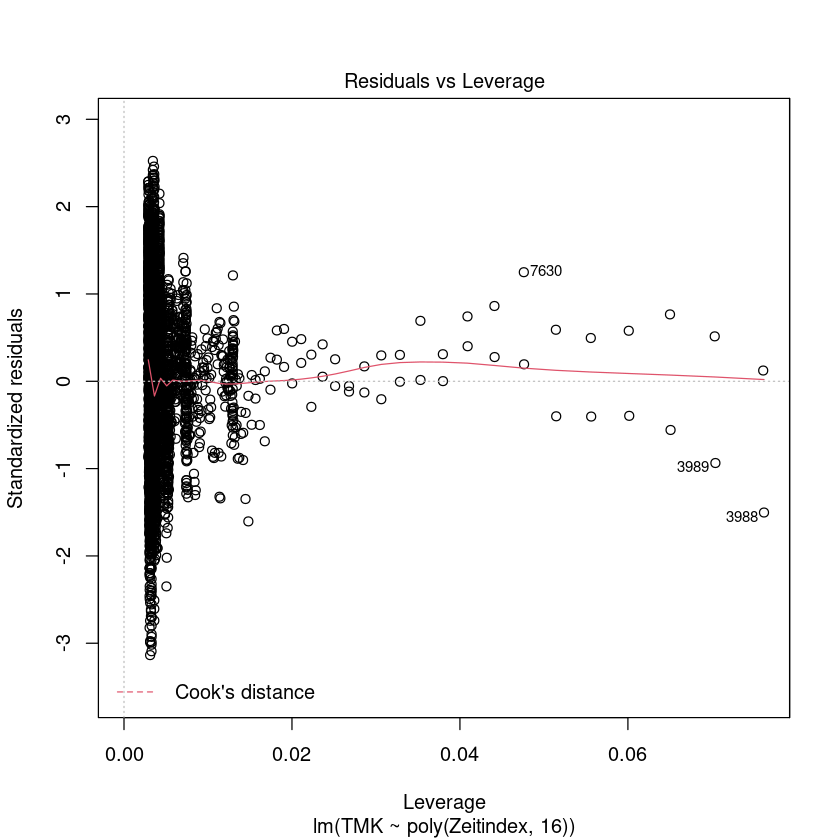

In [10]:
plot(modell_poly)